In [15]:
pacman::p_load(ggplot2,dplyr,tidyverse,tidyr,cowplot,patchwork,psych,
               beeswarm,ggbeeswarm,data.table,ggridges,rjson,ggupset,plotly,reticulate,
              plot3D,ggrepel,ggbreak)

In [25]:
#../../output/levenshtein/long_kmer_approach_count_1000000_not_compare_10/
base_dir="/vortexfs1/omics/alexander/akrinos/2022-euk-diversity/code/output/levenshtein/long_kmer_approach_count_1000000_not_compare_10"#kmer_approach_250"
combined_info=data.frame()
for (curr in list.files(base_dir)) {
    if (file.info(file.path(base_dir,curr))$size < 400) {
        print(file.info(file.path(base_dir,curr))$size)
        next
    }
    print("passed")
    combined_info= combined_info %>%
        dplyr::bind_rows(data.frame(fread(file.path(base_dir,curr),sep="\t")) %>%
        dplyr::rename(c("MMETSP"="V3","ClustNum"="V5","SeqNum"="V4")) %>% dplyr::mutate(Sample=curr))
}

[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"
[1] "passed"


In [26]:
combined_lab=combined_info %>% separate(Sample,sep="_",into=c("ID","extra"))
date_table=read.csv("/vortexfs1/omics/alexander/data/databases/marmmetsp-5Dec2022/tax-table.txt",sep="\t")
combined_lab=combined_lab %>% dplyr::left_join(date_table %>% dplyr::select(Source_ID,Supergroup,Family),by=c("ID"="Source_ID"))

In [27]:
head(combined_lab)

,V1,V2,MMETSP,SeqNum,ClustNum,ID,extra,Supergroup,Family
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,MMETSP0014_clean.fasta,cluster,49,0,138,MMETSP0014,clean.fasta.tsv,Stramenopiles,Bacillariaceae
2,MMETSP0014_clean.fasta,cluster,49,0,397,MMETSP0014,clean.fasta.tsv,Stramenopiles,Bacillariaceae
3,MMETSP0014_clean.fasta,cluster,49,0,448,MMETSP0014,clean.fasta.tsv,Stramenopiles,Bacillariaceae
4,MMETSP0014_clean.fasta,cluster,49,0,780,MMETSP0014,clean.fasta.tsv,Stramenopiles,Bacillariaceae
5,MMETSP0014_clean.fasta,cluster,49,0,977,MMETSP0014,clean.fasta.tsv,Stramenopiles,Bacillariaceae
6,MMETSP0014_clean.fasta,cluster,49,0,1058,MMETSP0014,clean.fasta.tsv,Stramenopiles,Bacillariaceae


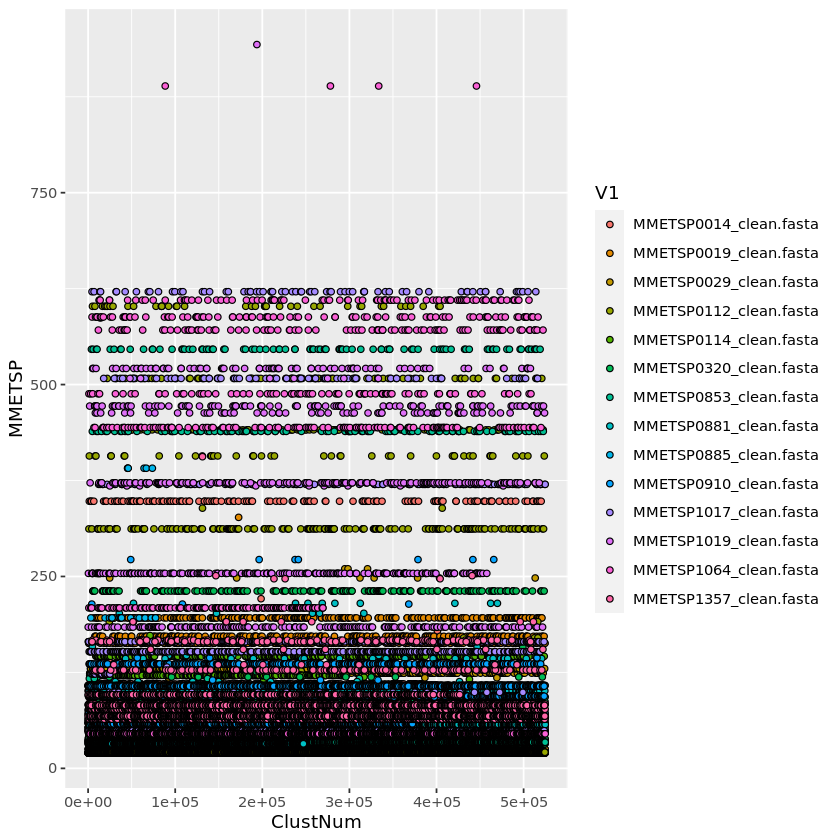

In [28]:
ggplot(combined_lab)+
    #dplyr::filter(Supergroup=="Hacrobia") %>%
    #tidyr::pivot_wider(id_cols = c("Family","Supergroup","ClustNum"),names_from = "V1",values_from="MMETSP"))+
    geom_point(aes(x=ClustNum,y=MMETSP, fill=V1),pch=21)

In [29]:
combined_lab %>% dplyr::group_by(ClustNum) %>% dplyr::tally() %>% arrange(desc(n)) %>% dplyr::filter(n>1)

ClustNum,n
<int>,<int>
431089,7
512873,7
60237,6
131294,6
512410,6
79540,5
207141,5
242439,5
1201,4


In [30]:
combined_lab %>% dplyr::group_by(ClustNum,Supergroup) %>% dplyr::tally() %>% arrange(desc(n)) %>% dplyr::filter(n>1)

ClustNum,Supergroup,n
<int>,<chr>,<int>
20347,Stramenopiles,4
29447,Stramenopiles,4
206773,Stramenopiles,4
247538,Stramenopiles,4
431089,Stramenopiles,4
512873,Stramenopiles,4
1201,Stramenopiles,3
1509,Hacrobia,3
11959,Stramenopiles,3


In [31]:
supergroup_list=unique((combined_lab %>%
       dplyr::filter(ClustNum %in% (combined_lab %>% dplyr::group_by(ClustNum) %>% dplyr::tally() %>% arrange(desc(n)) %>% dplyr::filter(n>1))$ClustNum) %>%
       dplyr::arrange(Supergroup))$V1)

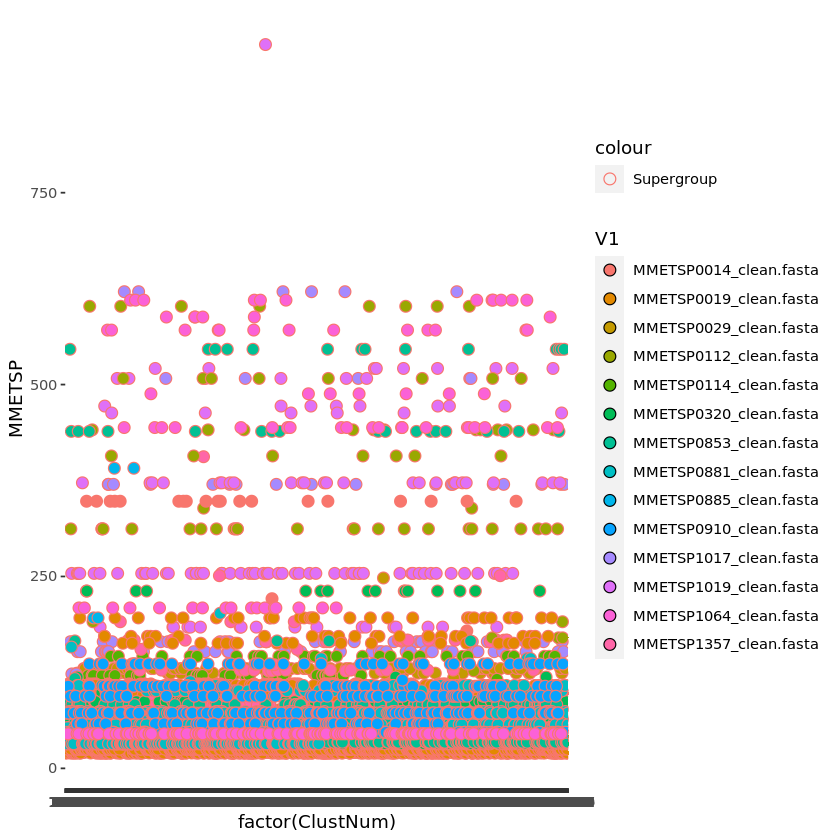

In [32]:
ggplot(combined_lab %>%
       dplyr::filter(ClustNum %in% (combined_lab %>% dplyr::group_by(ClustNum) %>% dplyr::tally() %>% arrange(desc(n)) %>% dplyr::filter(n>1))$ClustNum) %>%
       dplyr::arrange(Supergroup))+
    geom_point(aes(x=factor(ClustNum), y = MMETSP,fill=V1,color="Supergroup"),pch=21,stat="identity",size=3)

In [33]:
combined_lab%>%
    dplyr::filter(Supergroup=="Hacrobia") %>%
    tidyr::pivot_wider(id_cols = c("Family","Supergroup","ClustNum"),names_from = "V1",values_from="MMETSP") %>%
    tidyr::uncount(MMETSP1357_clean.fasta)#starts_with("MMETSP"))

Warning message:
“Values from `MMETSP` are not uniquely identified; output will contain list-cols.
* Use `values_fn = list` to suppress this warning.
* Use `values_fn = {summary_fun}` to summarise duplicates.
* Use the following dplyr code to identify duplicates.
  {data} %>%
    dplyr::group_by(Family, Supergroup, ClustNum, V1) %>%
    dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
    dplyr::filter(n > 1L)”


ERROR: [1m[33mError[39m in `tidyr::uncount()`:[22m
[33m![39m Can't convert `weights` <list> to <integer>.


Picking joint bandwidth of 10300



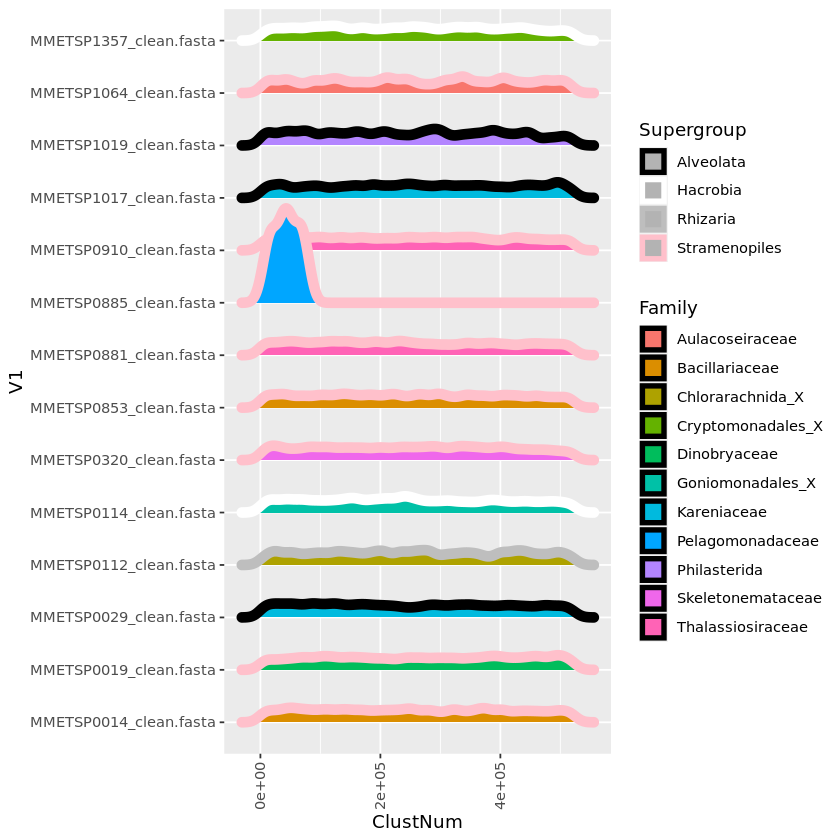

In [34]:
ggplot(combined_lab%>%
    tidyr::uncount(MMETSP)) + geom_density_ridges(aes(y = V1, x = ClustNum, fill = Family, color=Supergroup),size=3)+#,pch=21,size=3)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    scale_color_manual(values=c("black","white","gray","pink")) 

Picking joint bandwidth of 9860

Picking joint bandwidth of 10900



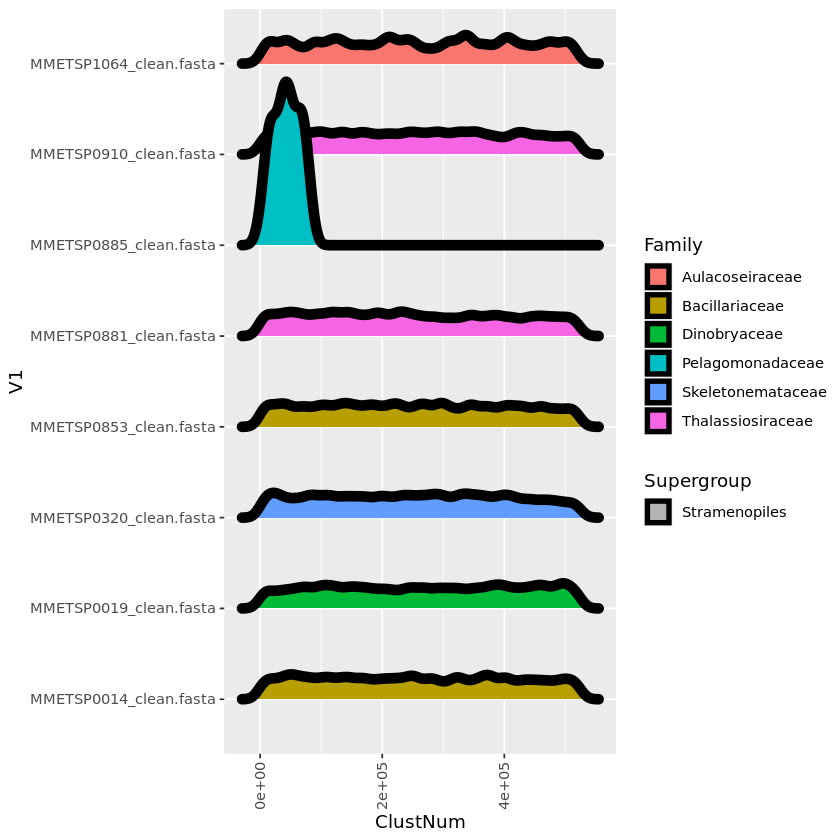

Picking joint bandwidth of 11400



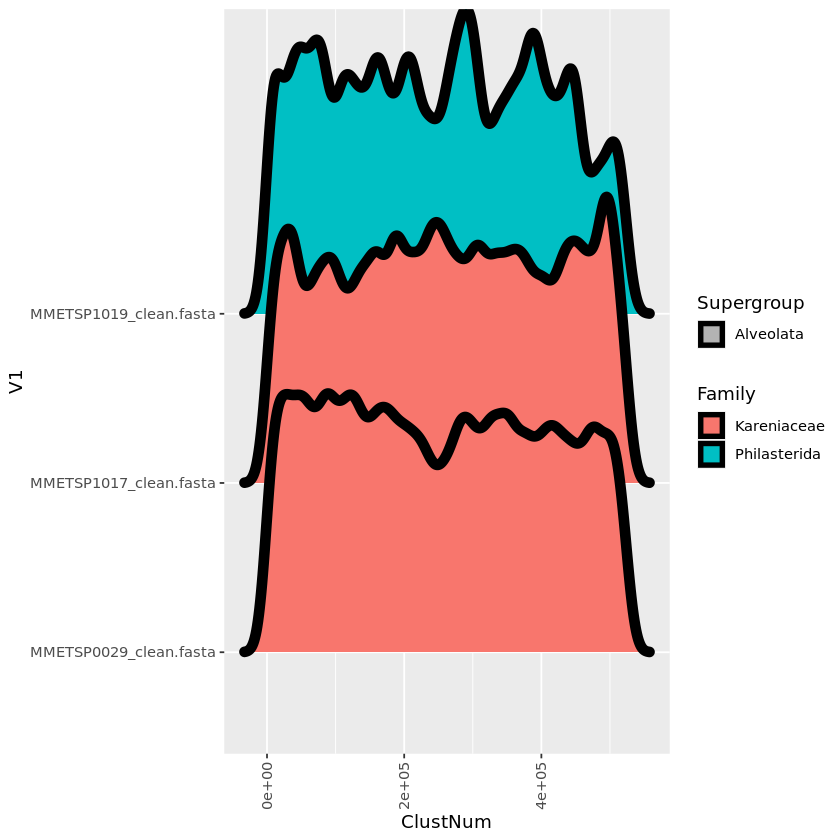

Picking joint bandwidth of 10700



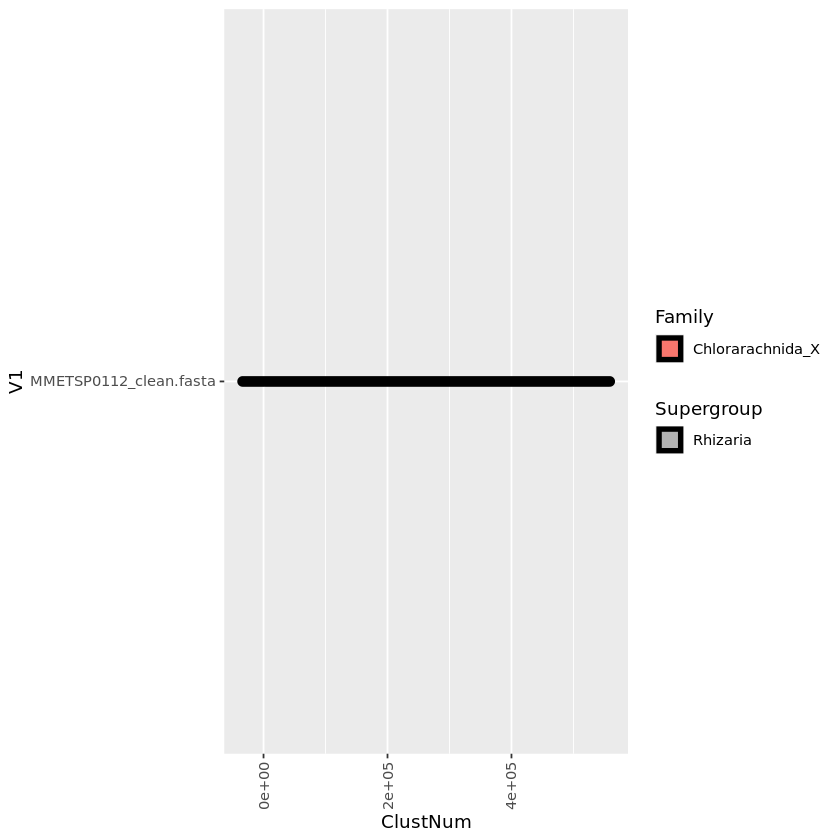

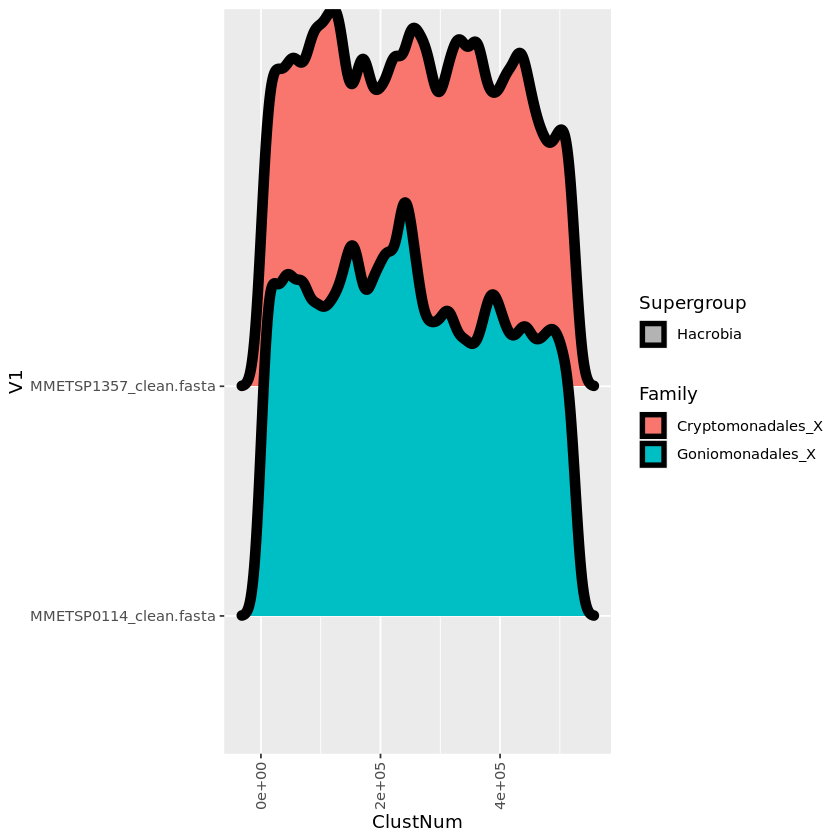

In [35]:
for (curr_grp in unique(combined_lab$Supergroup)) {
    print(ggplot(combined_lab%>%
    tidyr::uncount(MMETSP) %>% dplyr::filter(Supergroup==curr_grp)) + geom_density_ridges(aes(y = V1, x = ClustNum, fill = Family, color=Supergroup),size=3)+#,pch=21,size=3)+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    scale_color_manual(values=c("black","white","gray")))
}

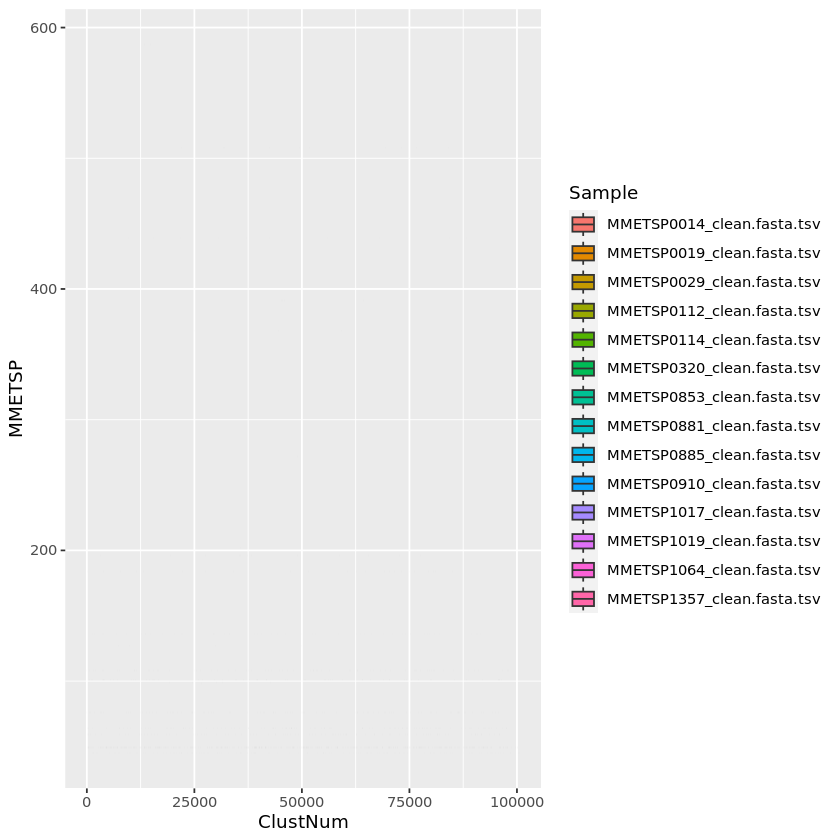

In [139]:
ggplot(combined_info) + geom_boxplot(aes(x = ClustNum, y = MMETSP, fill = Sample, 
                                         group = paste0(Sample,ClustNum)))

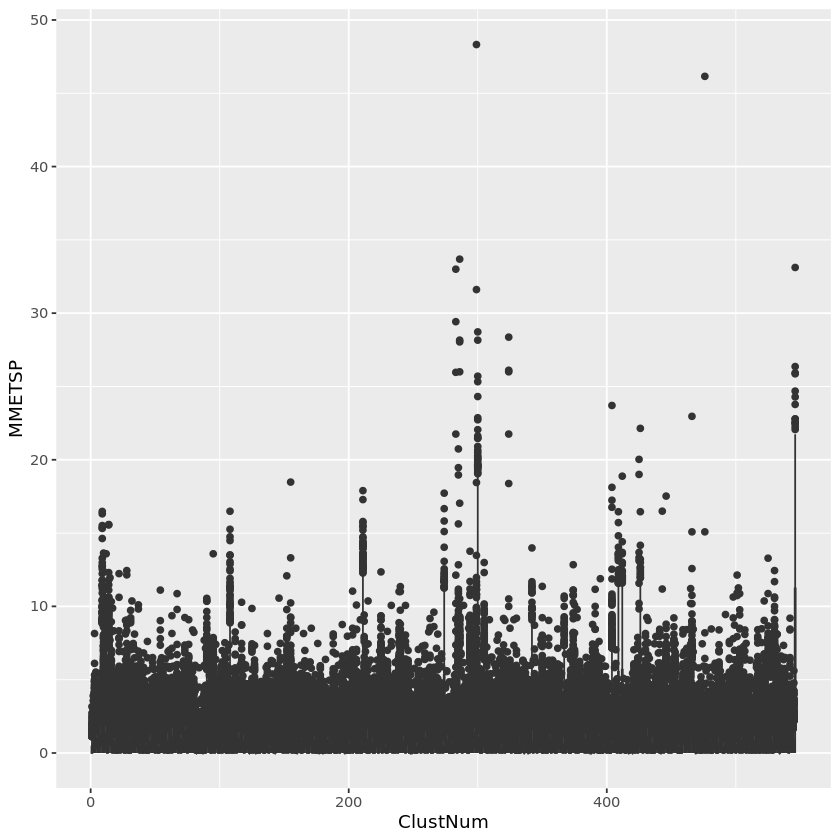

In [9]:
ggplot(combined_info) + geom_boxplot(aes(x = ClustNum, y = MMETSP, group = ClustNum))

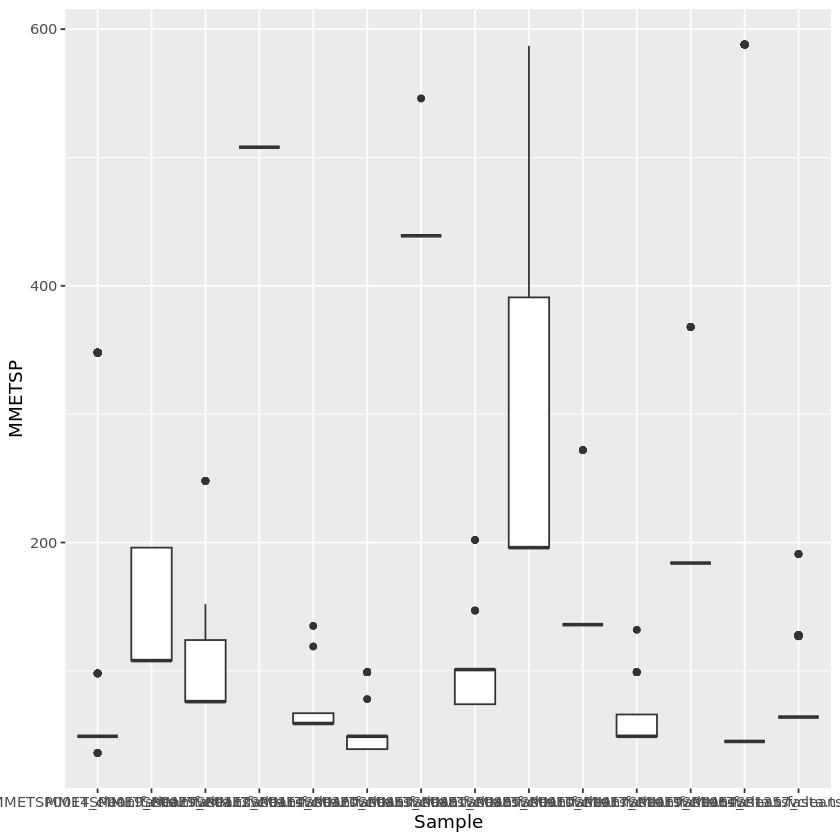

In [22]:
ggplot(combined_info) + geom_boxplot(aes(x = Sample, y = MMETSP, group = Sample))

In [37]:
pacman::p_load(xgboost,caret)

In [38]:
data=combined_info %>% pivot_wider(id_cols=c("Sample","SeqNum"),names_from = "ClustNum",
                         values_from="MMETSP")
data[is.na(data)] = 0

In [39]:
date_table=read.csv("/vortexfs1/omics/alexander/data/databases/marmmetsp-5Dec2022/tax-table.txt",sep="\t")

In [40]:
head(combined_info)

,V1,V2,MMETSP,SeqNum,ClustNum,Sample
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,MMETSP0007_clean.fasta,cluster,1.1627907,0,155,MMETSP0007_clean.fasta.tsv
2,MMETSP0007_clean.fasta,cluster,0.5813953,0,47,MMETSP0007_clean.fasta.tsv
3,MMETSP0007_clean.fasta,cluster,0.8720930,0,194,MMETSP0007_clean.fasta.tsv
4,MMETSP0007_clean.fasta,cluster,0.2906977,0,131,MMETSP0007_clean.fasta.tsv
5,MMETSP0007_clean.fasta,cluster,0.0000000,0,168,MMETSP0007_clean.fasta.tsv
6,MMETSP0007_clean.fasta,cluster,0.0000000,0,21,MMETSP0007_clean.fasta.tsv


In [41]:
data_lab=data %>% separate(Sample,sep="_",into=c("ID","extra"))

In [42]:
data_lab=data_lab %>% dplyr::left_join(date_table %>% dplyr::select(Source_ID,Supergroup),by=c("ID"="Source_ID"))

In [43]:
data_lab %>% pivot_longer(cols = !starts_with(c("ID","extra","SeqNum","Supergroup")),
                          names_to="ClustNum",values_to="MMETSP")

ID,extra,SeqNum,Supergroup,ClustNum,MMETSP
<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
MMETSP0007,clean.fasta.tsv,0,Hacrobia,155,1.1627907
MMETSP0007,clean.fasta.tsv,0,Hacrobia,47,0.5813953
MMETSP0007,clean.fasta.tsv,0,Hacrobia,194,0.8720930
MMETSP0007,clean.fasta.tsv,0,Hacrobia,131,0.2906977
MMETSP0007,clean.fasta.tsv,0,Hacrobia,168,0.0000000
MMETSP0007,clean.fasta.tsv,0,Hacrobia,21,0.0000000
MMETSP0007,clean.fasta.tsv,0,Hacrobia,50,0.2906977
MMETSP0007,clean.fasta.tsv,0,Hacrobia,171,0.0000000
MMETSP0007,clean.fasta.tsv,0,Hacrobia,23,0.8720930


In [16]:
data_lab %>% pivot_longer(cols = !starts_with(c("ID","extra","SeqNum","Supergroup")),
                          names_to="ClustNum",values_to="MMETSP") %>%
    dplyr::group_by(ID) %>% dplyr::summarize(mean(MMETSP),sd(MMETSP))

ID,mean(MMETSP),sd(MMETSP)
<chr>,<dbl>,<dbl>
MMETSP0708,0.6559379,0.7850015
MMETSP1019,0.5250346,1.1771243
MMETSP1319,1.0765806,1.1715061


In [44]:
data_lab %>% pivot_longer(cols = !starts_with(c("ID","extra","SeqNum","Supergroup")),
                          names_to="ClustNum",values_to="MMETSP") %>%
    dplyr::group_by(ClustNum) %>% dplyr::summarize(mmm=mean(MMETSP),sdd=sd(MMETSP)) %>%
    dplyr::arrange(desc(sdd))

ClustNum,mmm,sdd
<chr>,<dbl>,<dbl>
300,8.954102,4.682731
108,4.138998,3.033736
9,4.052587,2.593710
546,4.399200,2.565315
342,4.831954,2.226015
530,2.529482,2.166056
240,2.277205,2.155929
294,2.818197,2.079945
367,3.943429,1.999421


`summarise()`
has grouped
output by
'ID'. You can
override
using the
`.groups`
argument.


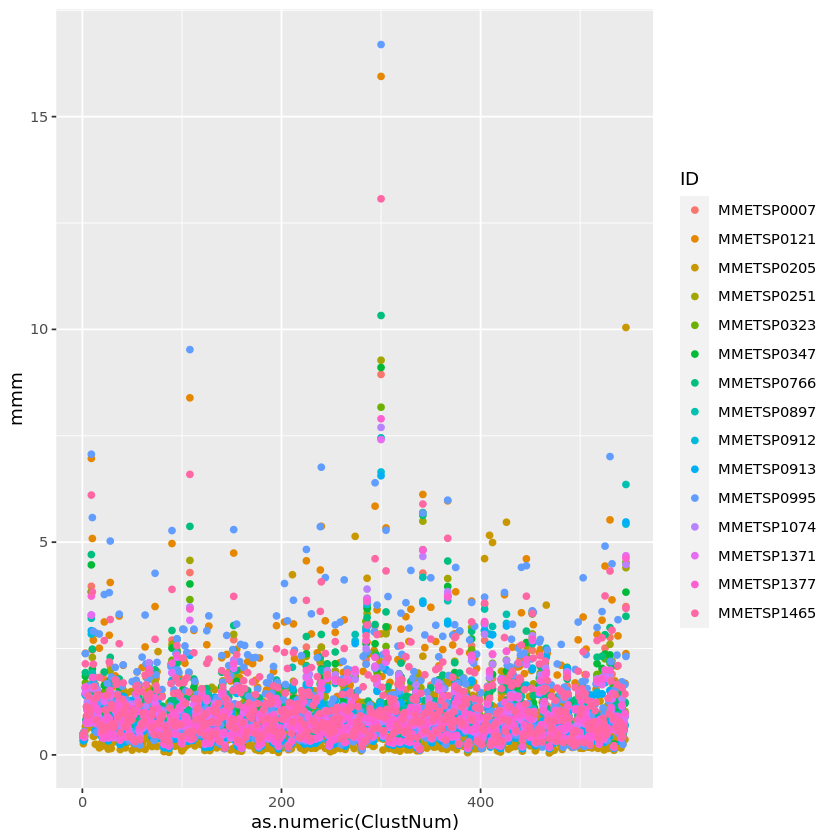

In [45]:
ggplot(data_lab %>% pivot_longer(cols = !starts_with(c("ID","extra","SeqNum","Supergroup")),
                          names_to="ClustNum",values_to="MMETSP") %>%
    dplyr::group_by(ID,ClustNum) %>% dplyr::summarize(mmm=mean(MMETSP),sd(MMETSP)))+
    geom_point(aes(x = as.numeric(ClustNum), y = mmm, color=ID))

In [46]:
parts = createDataPartition(data_lab$Supergroup, p = 0.7, list = F)

In [47]:
train = data_lab[parts, ]
test = data_lab[-parts, ]

In [48]:
X_train = data.matrix(train%>%dplyr::select(-ID,-SeqNum,-extra,-Supergroup)) #-Sample,-SeqNum))                  # independent variables for train
colnames(X_train) = paste0("tester_",colnames(X_train) )
X_train[is.infinite(X_train)] = 0
y_train = train$Supergroup #Sample                                # dependent variables for train
  
X_test = data.matrix(test%>%dplyr::select(-ID,-SeqNum,-extra,-Supergroup))#-Sample,-SeqNum))                    # independent variables for test
X_test[is.infinite(X_test)] = 0
colnames(X_test) = paste0("tester_",colnames(X_test) )
y_test = test$Supergroup #Sample                                   # dependent variables for test

# convert the train and test data into xgboost matrix type.
xgboost_train = xgb.DMatrix(data=X_train, label=as.numeric(factor(y_train))-1)
xgboost_test = xgb.DMatrix(data=X_test, label=as.numeric(factor(y_test))-1)

In [51]:
data_lab=data_lab %>% dplyr::left_join(date_table %>% dplyr::select(Source_ID,Family),by=c("ID"="Source_ID"))

In [26]:
rank_mat=combined_info %>% dplyr::group_by(Sample,SeqNum) %>% 
    dplyr::mutate(rank=rank(MMETSP)) %>% dplyr::arrange(desc(rank))%>% 
    separate(Sample,sep="_",into=c("ID","extra"))%>% 
    dplyr::left_join(date_table %>% dplyr::select(Source_ID,Family),by=c("ID"="Source_ID"))%>% 
    pivot_wider(id_cols=c("ID","SeqNum","Family"),names_from = "ClustNum",
                         values_from="rank")

In [27]:
rank_mat[is.na(rank_mat)]=100

In [28]:
rank_mat %>% pivot_longer(cols = !starts_with(c("ID","extra","SeqNum","Family")),
                          names_to="ClustNum",values_to="MMETSP") %>%
    dplyr::group_by(ClustNum,Family) %>% dplyr::summarize(meanMM=mean(MMETSP),sdMM=sd(MMETSP)) %>%
    dplyr::arrange(ClustNum,Family)

`summarise()`
has grouped
output by
'ClustNum'.
You can
override
using the
`.groups`
argument.


ClustNum,Family,meanMM,sdMM
<chr>,<chr>,<dbl>,<dbl>
1,Bolidomonadaceae,139.7170,98.79920
1,Fragilariaceae,186.9565,112.69260
1,Philasterida,194.6281,107.00232
10,Bolidomonadaceae,488.2558,84.91985
10,Fragilariaceae,403.7143,118.49242
10,Philasterida,329.9263,128.09921
100,Bolidomonadaceae,160.4332,115.56532
100,Fragilariaceae,140.2217,109.42349
100,Philasterida,166.9330,92.48854


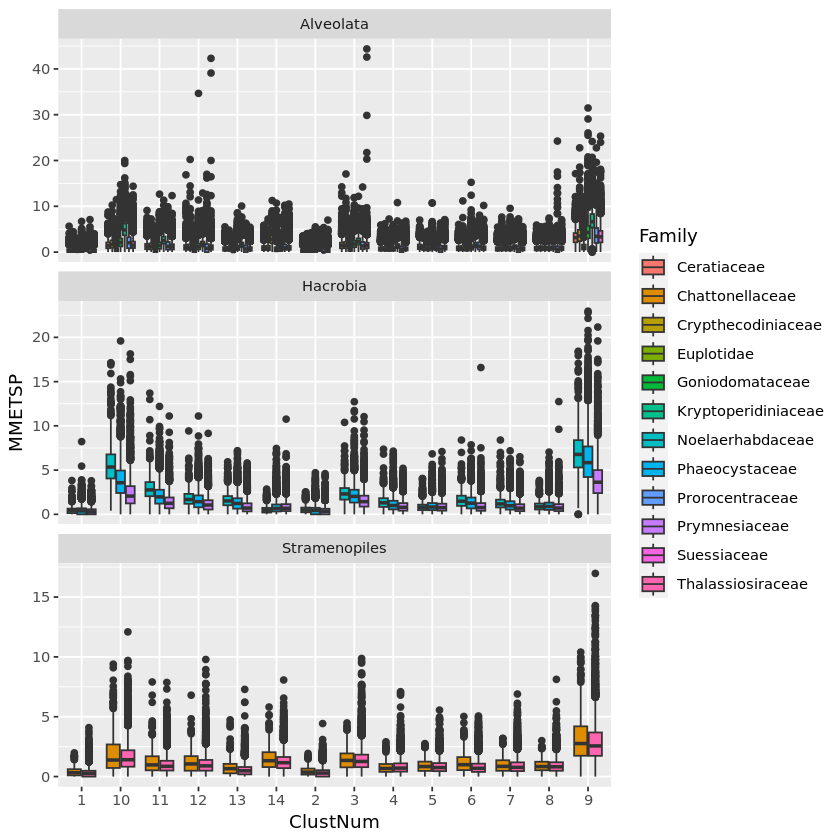

In [52]:
ggplot(data_lab %>% pivot_longer(cols = !starts_with(c("ID","extra","SeqNum","Family","Supergroup")),
                          names_to="ClustNum",values_to="MMETSP")  %>% dplyr::filter(as.numeric(ClustNum)<15)) + 
    geom_boxplot(aes(fill = Family, y = MMETSP, x=ClustNum,
                                         group = paste0(Family,ClustNum))) + facet_wrap(~Supergroup,ncol=1,
                                                                                        scales="free_y")

In [53]:
length(unique(as.numeric(factor(y_test))-1))

[1] 3

In [37]:
1/38

[1] 0.02631579

In [58]:
param <- list(booster = "gblinear", objective = "multi:softprob", 
              num_class = length(unique(as.numeric(factor(y_test))-1)),
              niter=800,"eval_metric" = "mlogloss",lambda = 0.0003, alpha = 0.0003, nthread = 10)
bst_cv <- xgb.cv(param, xgboost_train, nfold = 6, nrounds = 10, eta = 0.1,
callbacks = list(cb.gblinear.history(FALSE)),
                   prediction = TRUE)

[1]	train-mlogloss:0.824449+0.001351	test-mlogloss:0.825425+0.004681 
[2]	train-mlogloss:0.775550+0.000388	test-mlogloss:0.777515+0.003952 
[3]	train-mlogloss:0.752250+0.000512	test-mlogloss:0.755334+0.003376 
[4]	train-mlogloss:0.738095+0.000645	test-mlogloss:0.742266+0.003266 
[5]	train-mlogloss:0.727798+0.000783	test-mlogloss:0.733079+0.003372 
[6]	train-mlogloss:0.719523+0.000861	test-mlogloss:0.725855+0.003615 
[7]	train-mlogloss:0.712628+0.000914	test-mlogloss:0.719978+0.003851 
[8]	train-mlogloss:0.706747+0.000965	test-mlogloss:0.715088+0.004092 
[9]	train-mlogloss:0.701644+0.000996	test-mlogloss:0.710931+0.004318 
[10]	train-mlogloss:0.697156+0.001019	test-mlogloss:0.707355+0.004525 


In [59]:
OOF_prediction <- data.frame(bst_cv$pred) %>%
  mutate(max_prob = max.col(., ties.method = "first"),
         label = as.numeric(factor(y_train))-1)
head(OOF_prediction,n=8)

,X1,X2,X3,max_prob,label
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,0.7446783,0.12157084,0.13375087,1,1
2,0.7175125,0.25316232,0.02932520,1,1
3,0.7182462,0.15058109,0.13117275,1,1
4,0.3495941,0.21636790,0.43403795,3,1
5,0.7814797,0.11990979,0.09861057,1,1
6,0.4819503,0.48706576,0.03098395,2,1
7,0.8328043,0.07322451,0.09397120,1,1
8,0.6789880,0.14776398,0.17324796,1,1


In [60]:
OOF_prediction %>% dplyr::mutate(error=case_when(max_prob==label~"Correct",
                                           TRUE ~ "Wrong")) %>%
    dplyr::group_by(label,error,max_prob) %>% dplyr::tally() %>% dplyr::arrange(error)

label,error,max_prob,n
<dbl>,<chr>,<int>,<int>
1,Correct,1,3869
2,Correct,2,102
0,Wrong,1,14716
0,Wrong,2,856
0,Wrong,3,797
1,Wrong,2,1433
1,Wrong,3,109
2,Wrong,1,3281
2,Wrong,3,848


In [80]:
factor(OOF_prediction$max_prob)

[1] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
   [37] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
   [73] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [109] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [145] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [181] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [217] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [253] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [289] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [325] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [361] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [397] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [433] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [469] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [505] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [541] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [577] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [613] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [649] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [685] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [721] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [757] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [793] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [829] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [865] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [901] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [937] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [973] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1009] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1045] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1081] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1117] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1153] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1189] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1225] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1261] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1297] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1333] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1369] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1405] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1441] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1477] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1513] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1549] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1585] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1621] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1657] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1693] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1729] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1765] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [18

In [79]:
confusionMatrix(factor(OOF_prediction$max_prob),
                factor(OOF_prediction$label),
                mode = "everything")

ERROR: Error in confusionMatrix.default(factor(OOF_prediction$max_prob), factor(OOF_prediction$label), : The data must contain some levels that overlap the reference.
